<a href="https://colab.research.google.com/github/Vineetha-otl/Dtasets-Folder/blob/main/Copy_of_Credit_card_fraud_detection_VR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Import** **modules**

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import skew
#%matplotlib inline

# **Loading the dataset**



In [ ]:
# Reading the dataset from kaggle by downloading the dataset
df = pd.read_csv('/content/drive/MyDrive/creditcard.csv')   #(r"C:\\Users\\Santhosh\\Vineetha\\Credit card fraud detection\\creditcard.cscv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
# Shows the first 5 rows by default
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Shows the last % rows by default
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
# Shows the total number of rows and columns
df.shape

(284807, 31)

In [ ]:
#Statistical information
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
# T means for Transpose
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [ ]:
# Datatype information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# **Preprocessing the dataset**




In [ ]:
# Check for null values
df.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Check for null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
# Removing the duplicates
df.duplicated().sum()

1081

In [ ]:
df.drop_duplicates(inplace=True)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Skewness

In [ ]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 43 kB/s 
     |████████████████████████████████| 199 kB 46.3 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=8ae3224da73500cc015190a7d4bdfa4f88d6d2f1c1adec4fc3a9be565738f511
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


Time
-0.03558045812827333


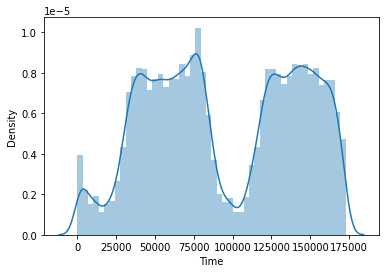

V1
-3.2732539433146486


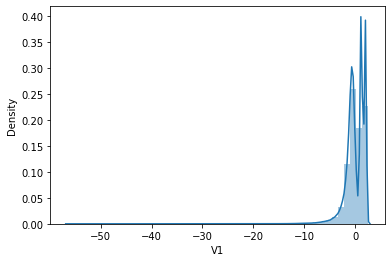

V2
-4.695137078165384


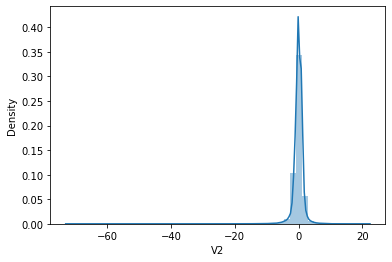

V3
-2.1519725799940685


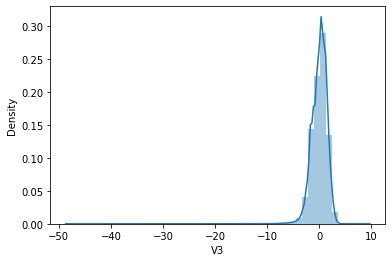

V4
0.6715006205655543


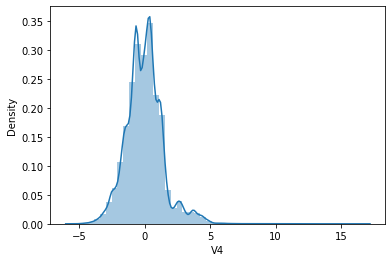

V5
-2.414066484215612


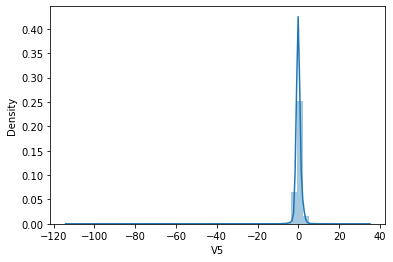

V6
1.829870709562578


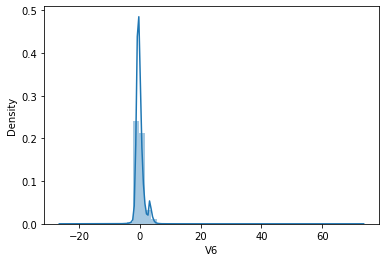

V7
2.8902559124339735


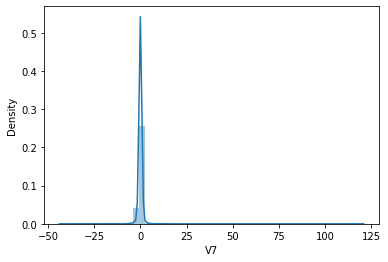

V8
-8.310926391626731


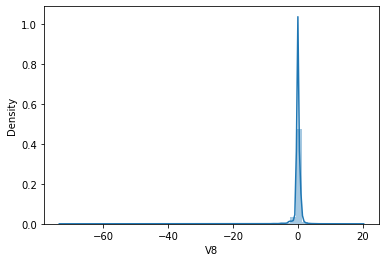

V9
0.5376602109334492


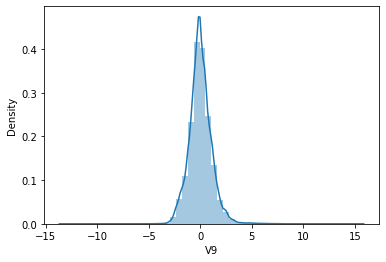

V10
1.2529604545622932


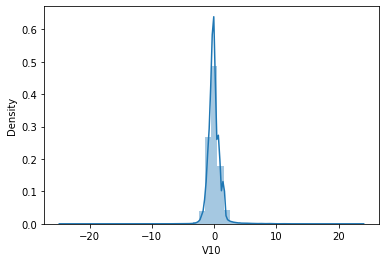

V11
0.34407237420591985


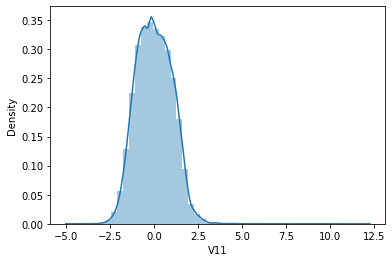

V12
-2.198996655901221


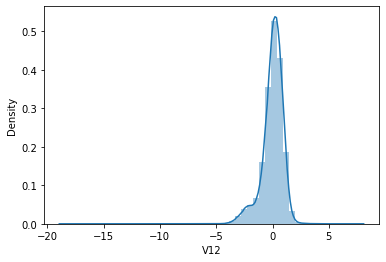

V13
0.06429306473390328


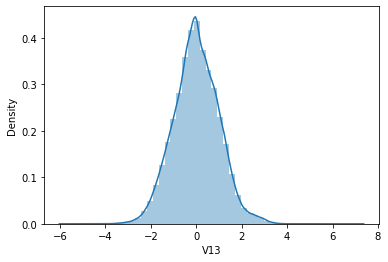

V14
-1.9187935694299705


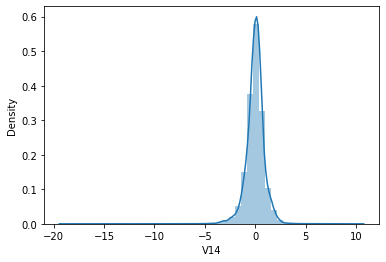

V15
-0.3096574451884751


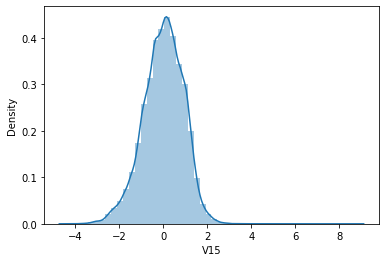

V16
-1.0511559142385323


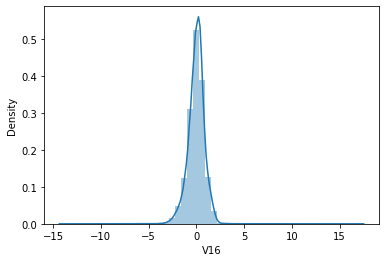

V17
-3.690477683233225


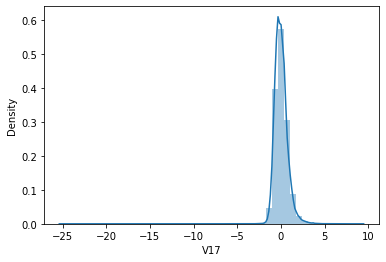

V18
-0.24866014274940992


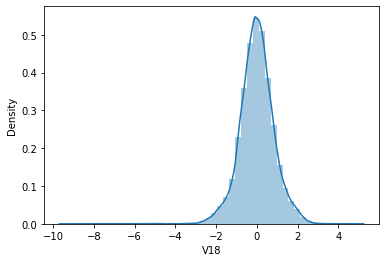

V19
0.1083112383097532


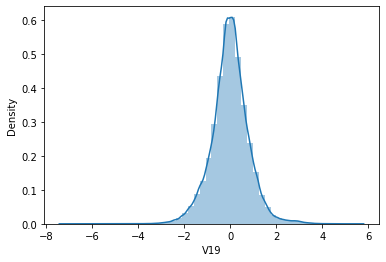

V20
-2.043110254457915


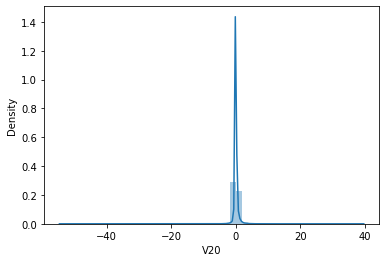

V21
2.8200182046255926


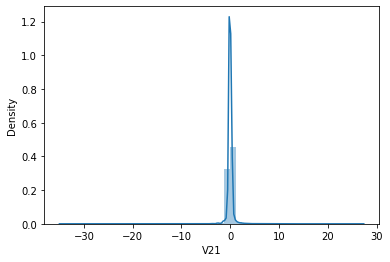

V22
-0.18232876403467282


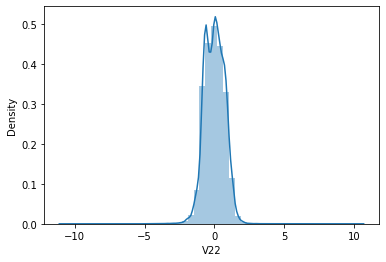

V23
-5.867189772192024


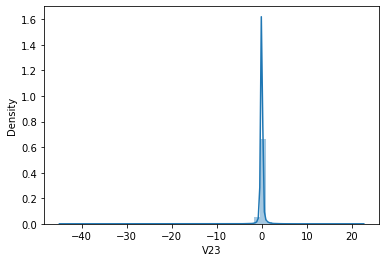

V24
-0.5521263176758532


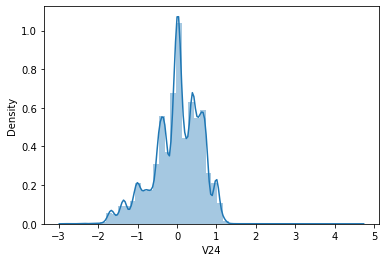

V25
-0.41574166410065255


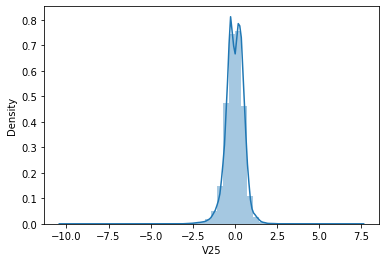

V26
0.5802892493462333


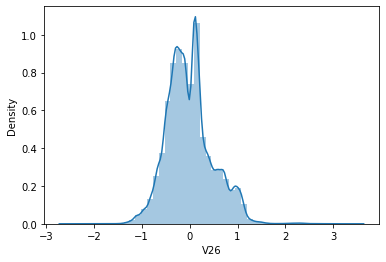

V27
-0.7537999286092231


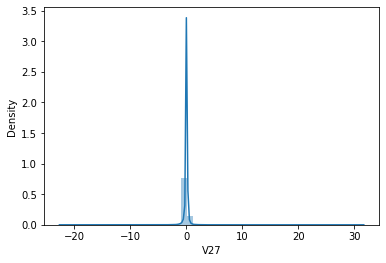

V28
11.555053994631207


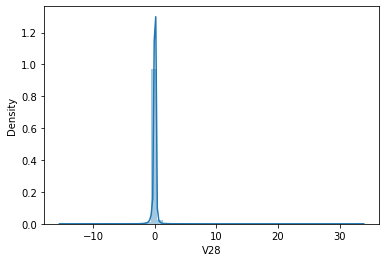

Amount
16.978713606547593


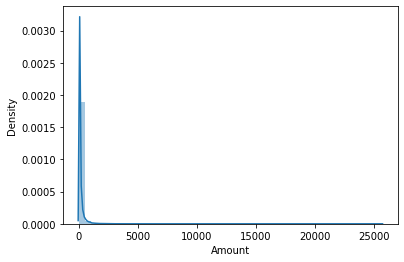

Class
24.430415913002122


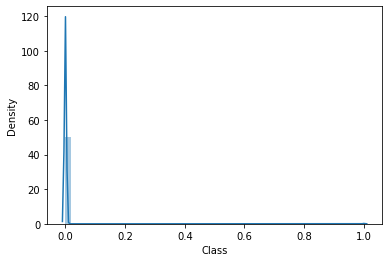

In [ ]:
for columns in df:
    print(columns)
    print(skew(df[columns]))
    plt.figure()
    sns.distplot(df[columns])
    plt.show()

# **Distribution of legit & fradulent transaction**

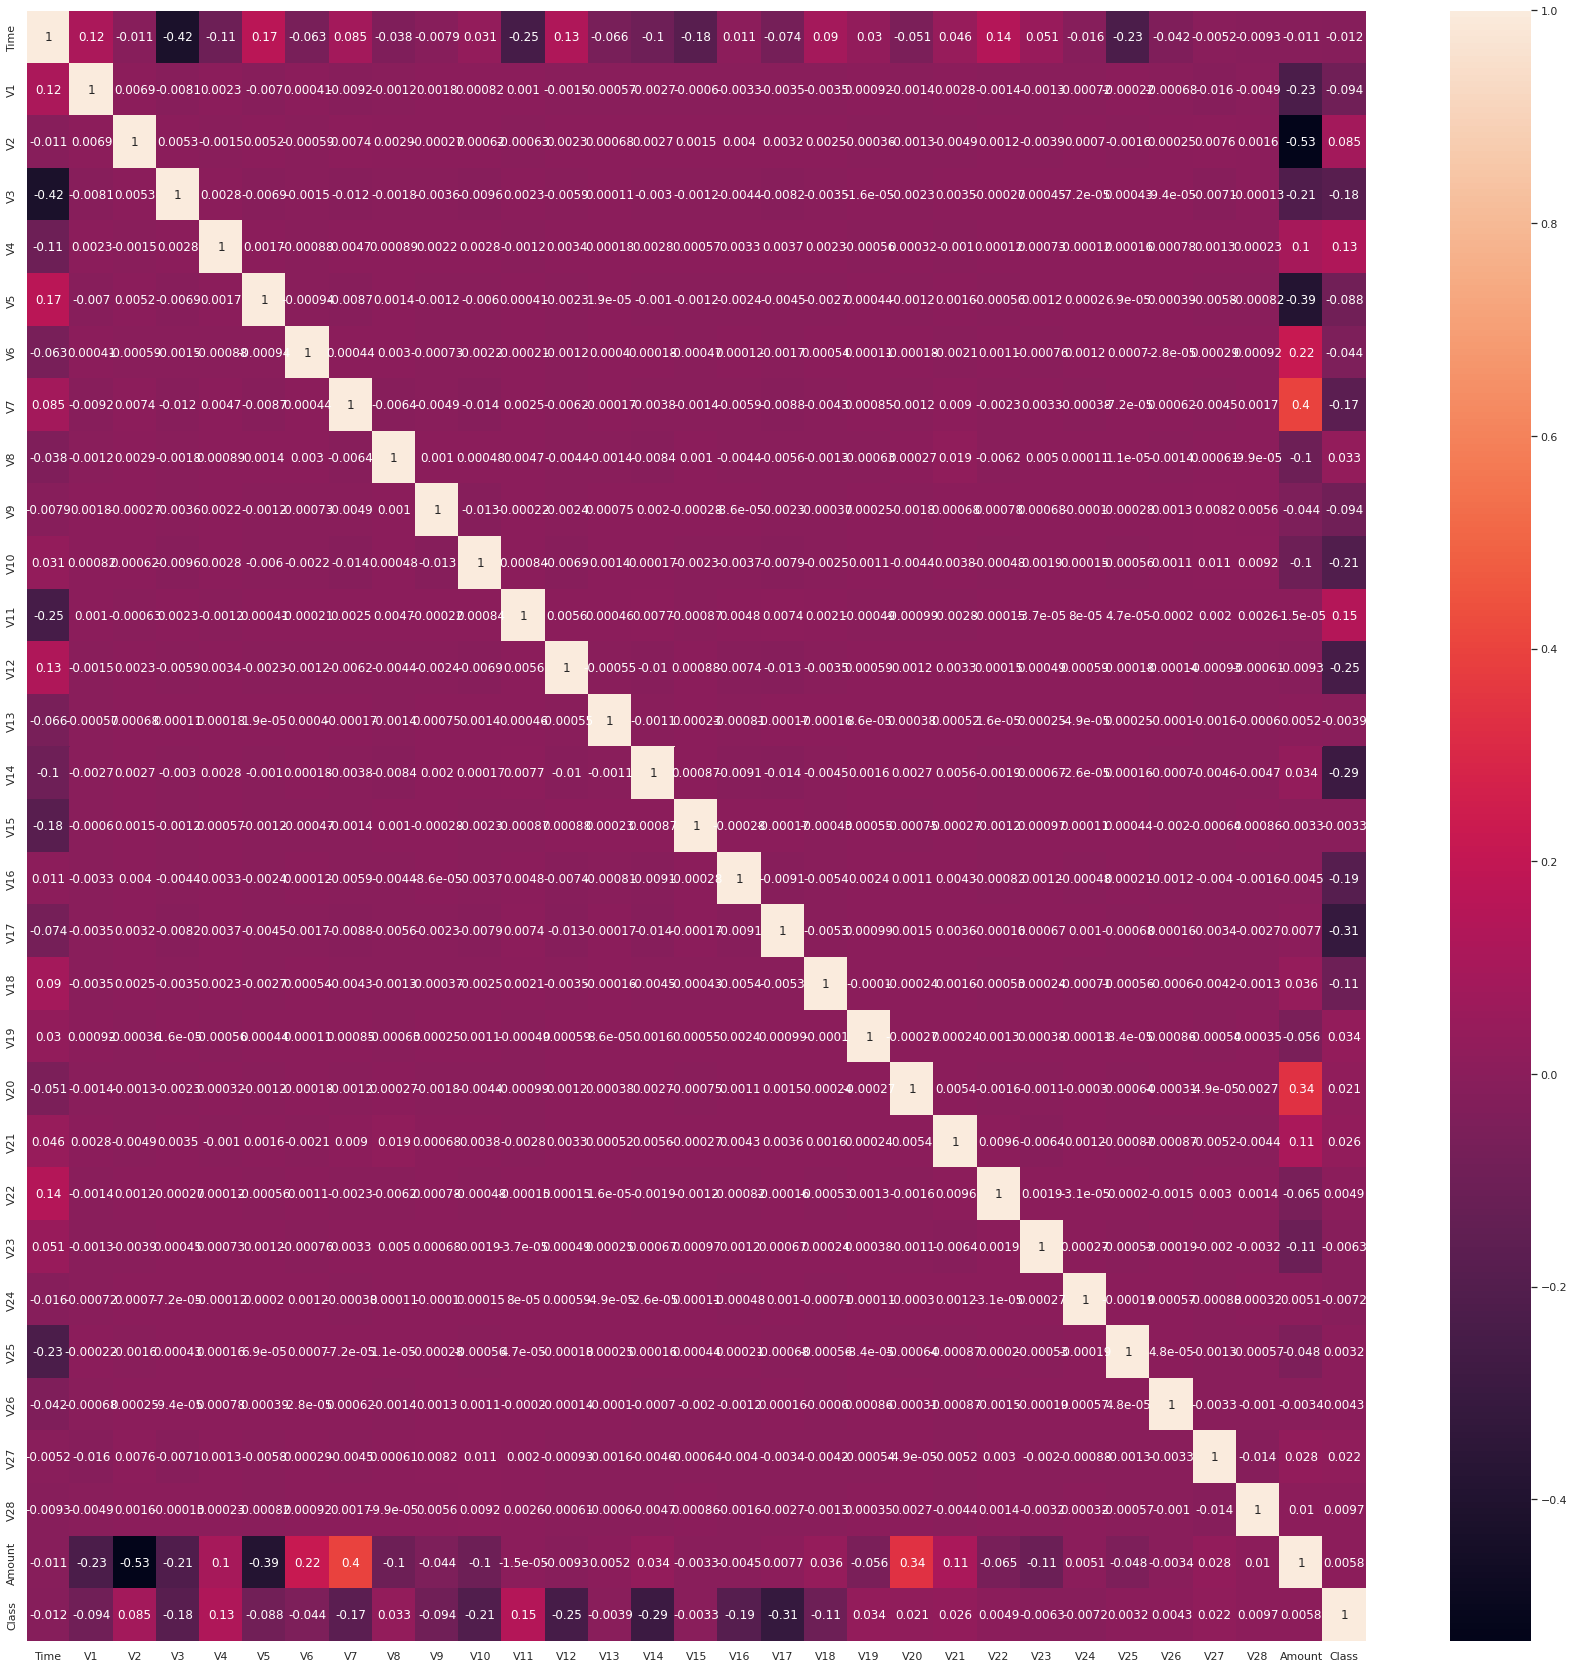

In [ ]:
#df.corr()
sns.set(rc={'figure.figsize':(30,30)})
corr = df.corr()
sns.heatmap(corr, annot=True)

# Exploratory Data Analysis

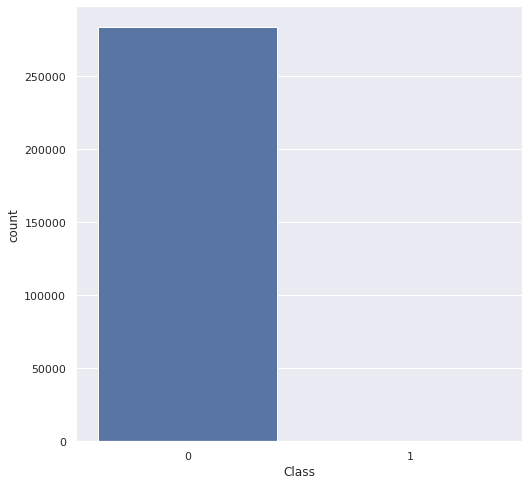

In [ ]:
# Shows the distribution between the class column
sns.set(rc={'figure.figsize':(8,8)})
sns.countplot(df['Class'])
plt.show()

In [ ]:
df['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

**This dataset is highly unbalanced**

- 0 --> NORMAL TRANSACTION
- 1 --> FRADULENT TRANSACTION

In [ ]:
# Separating the data for analysis
legit=df[df.Class==0]
fraud=df[df.Class==1]

In [ ]:
print(legit.shape)

(283253, 31)


In [ ]:
print(fraud.shape)

(473, 31)


In [ ]:
# Statistical measures of the data for particular column
legit.Amount.describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
# Compare the values for both transactions
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94835.058093,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,...,-0.000489,-0.00115,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,88.413575
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.46655,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


# Dealing with imbalanced data by Under-Sampling

- Build a sample dataset containing similar distribution of normal transactions and fradulent transactions

In [ ]:
np.random.seed(3)
legit_sample=legit.sample(n=473) # Fraud transaction=473 ,so we randomly sample 473 legit dataset

In [ ]:
new_dataset=pd.concat([legit_sample,fraud],axis=0) # add row-wise (axis=0)

In [ ]:
new_dataset.shape

(946, 31)

In [ ]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
178812,123792.0,0.227318,0.329497,0.540253,-0.896754,0.598434,0.838007,0.004997,0.321703,0.585747,...,0.231670,0.815008,-0.252218,-0.327390,-0.176310,-0.273304,0.077106,0.000928,0.01,0
249863,154611.0,2.038839,-0.149242,-2.956730,-0.577779,2.608658,3.142897,-0.415941,0.784209,0.359819,...,-0.351904,-0.997312,0.362859,0.604863,-0.264820,0.219595,-0.039344,-0.042663,2.69,0
239436,150107.0,-0.756581,0.339872,-0.318501,-0.717345,0.743666,-0.016891,1.754176,-0.115205,-0.554295,...,0.222798,0.144841,-0.059608,-0.110158,1.143284,0.817861,-0.219694,-0.043305,234.51,0
217866,141072.0,1.948700,-0.554246,-0.975652,0.661720,-0.697852,-1.089365,-0.147841,-0.259557,-1.055040,...,0.014258,0.460254,0.086333,0.505253,0.068890,-0.484124,0.012057,-0.042083,62.00,0
23807,32925.0,-8.321208,4.589644,-6.546650,1.359235,-5.417690,-1.357975,-2.904797,5.412110,-0.134929,...,0.246966,0.009702,0.111681,0.392514,-0.131513,-0.363780,0.161165,-0.061328,89.99,0


In [ ]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [ ]:
new_dataset['Class'].value_counts()

0    473
1    473
Name: Class, dtype: int64

In [ ]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95086.109937,-0.11803,0.020526,0.021722,-0.084574,0.154191,0.098591,0.069066,0.051801,-0.003725,...,-0.007100,0.003977,-0.000366,0.044009,0.030930,-0.010842,0.014775,-0.016888,-0.007797,80.886617
1,80450.513742,-4.49828,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.466550,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


- Here,nature of dataset is not changed--->since the mean value is not having much differnce in the values compared to original dataset it's a good sample

# Splitting the dataset into Features & targets

In [ ]:
X=new_dataset.drop(columns='Class',axis=1)
Y=new_dataset['Class']

In [ ]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
178812  123792.0  0.227318  0.329497  0.540253 -0.896754  0.598434  0.838007   
249863  154611.0  2.038839 -0.149242 -2.956730 -0.577779  2.608658  3.142897   
239436  150107.0 -0.756581  0.339872 -0.318501 -0.717345  0.743666 -0.016891   
217866  141072.0  1.948700 -0.554246 -0.975652  0.661720 -0.697852 -1.089365   
23807    32925.0 -8.321208  4.589644 -6.546650  1.359235 -5.417690 -1.357975   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [ ]:
print(Y)

178812    0
249863    0
239436    0
217866    0
23807     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 946, dtype: int64


**Split the data into Training data & Testing data**

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=3)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(946, 30) (756, 30) (190, 30)


**Model Training**

# Logistic Regression

In [ ]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
from sklearn.linear_model import LogisticRegression # works on linear algebra
from sklearn.tree import DecisionTreeClassifier #gini index entropy
from sklearn.ensemble import RandomForestClassifier # gini index entropy
from sklearn.neighbors import KNeighborsClassifier # ecludian distance


In [ ]:
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
#accuracy on train data
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)
training_data_accuracy

0.9140211640211641

In [ ]:
#accuracy on test data
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(Y_test,X_test_prediction)
test_data_accuracy

0.9421052631578948

In [ ]:
recall_log = recall_score(X_test_prediction, Y_test)
precision_log = precision_score(X_test_prediction, Y_test)
print('Recall score on LogisticReg test data : ',recall_log)
print('Precision score on LogisticReg test data : ',precision_log)

Recall score on LogisticReg test data :  0.9666666666666667
Precision score on LogisticReg test data :  0.9157894736842105


# Knn algorithm

In [ ]:
model1=KNeighborsClassifier(n_neighbors=3)
model1.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
#accuracy on train data
X_train_prediction=model1.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)
training_data_accuracy

0.8121693121693122

In [ ]:
#accuracy on test data
X_test_prediction=model1.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)
test_data_accuracy

0.6684210526315789

In [ ]:
recall_KNN = recall_score(X_test_prediction, Y_test)
precision_KNN = precision_score(X_test_prediction, Y_test)
print('Recall score on KNN test data : ',recall_KNN)
print('Precision score on KNN test data : ',precision_KNN)

Recall score on KNN test data :  0.6739130434782609
Precision score on KNN test data :  0.6526315789473685


# Decision Tree Classifier

In [ ]:
model2= DecisionTreeClassifier()
model2.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
#accuracy on train data
X_train_prediction=model2.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)
training_data_accuracy

1.0

In [ ]:
#accuracy on test data
X_test_prediction=model2.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)
test_data_accuracy

0.9315789473684211

In [ ]:
recall_tree = recall_score(X_test_prediction,Y_test)
precision_tree = precision_score(X_test_prediction, Y_test)
print('Recall score on DecisionTree test data : ',recall_tree)
print('Precision score on DecisionTree test data : ',precision_tree)

Recall score on DecisionTree test data :  0.9270833333333334
Precision score on DecisionTree test data :  0.9368421052631579


#  random forest algorithm

In [ ]:
model3 = RandomForestClassifier()
model3.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
#accuracy on train data
train_prediction = model3.predict(X_train)
training_data_accuracy = accuracy_score(train_prediction,Y_train)
training_data_accuracy

1.0

In [ ]:
#accuracy on test data
X_test_prediction= model3.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)
test_data_accuracy

0.9526315789473684

In [ ]:
recall_forest = recall_score(X_test_prediction, Y_test)
precision_forest = precision_score(X_test_prediction, Y_test)
print('Recall score on RandomForest test data : ',recall_forest)
print('Precision score on RandomForest test data : ',precision_forest)

Recall score on RandomForest test data :  0.967391304347826
Precision score on RandomForest test data :  0.9368421052631579


In [ ]:
Models = ['Logistic Regression','KNN','Decision Tree','Random Forest']
train_accuracy = [training_data_accuracy,training_data_accuracy,training_data_accuracy,training_data_accuracy]
test_accuracy = [test_data_accuracy,test_data_accuracy,test_data_accuracy,test_data_accuracy]
recall_score = [recall_log,recall_KNN,recall_tree,recall_forest]
precision_score = [precision_log,precision_KNN,precision_tree,precision_forest]

In [ ]:
Model_Scores= {'Models': Models, 'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy, 'Recall Score':recall_score,'Precision Score':precision_score}
df1 = pd.DataFrame(Model_Scores)
df1

,Models,Train Accuracy,Test Accuracy,Recall Score,Precision Score
0,Logistic Regression,1.0,0.952632,0.966667,0.915789
1,KNN,1.0,0.952632,0.673913,0.652632
2,Decision Tree,1.0,0.952632,0.927083,0.936842
3,Random Forest,1.0,0.952632,0.967391,0.936842
